In [1]:
#deep and wide Neural Network

#more flexible then keras sequqntial api

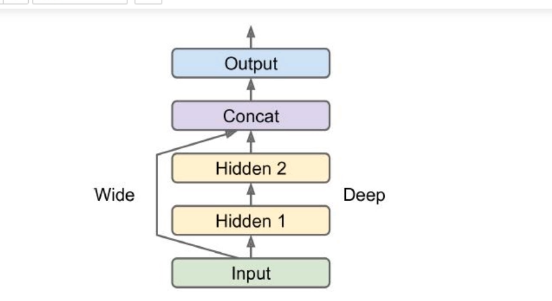

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

2023-02-22 20:08:57.753448: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-22 20:08:58.301093: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-22 20:08:58.301152: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-22 20:09:00.472184: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [5]:
#Data set

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [6]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

In [9]:
x_train_full.shape, x_test.shape, y_train_full.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [10]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)

In [11]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((11610, 8), (3870, 8), (11610,), (3870,))

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

In [13]:
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
# making layers

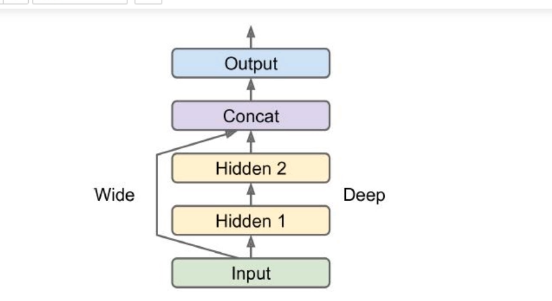

In [15]:
input_ = keras.layers.Input(shape=x_train.shape[1])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

2023-02-22 20:09:03.759167: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-22 20:09:03.759211: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-22 20:09:03.759248: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (prip): /proc/driver/nvidia/version does not exist
2023-02-22 20:09:03.759939: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model = keras.models.Model(inputs=[input_], outputs=[output])

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

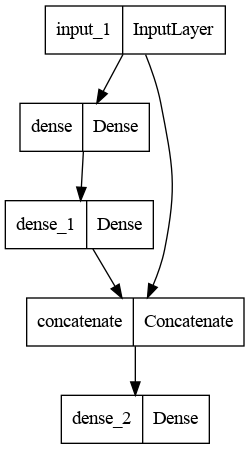

In [18]:
keras.utils.plot_model(model)

In [19]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=['mae'])

In [20]:
model_history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid,y_valid))

Epoch 1/100
363/363 [==============================] - 3s 7ms/step - loss: 1.6539 - mae: 0.9016 - val_loss: 0.8090 - val_mae: 0.6223
Epoch 2/100
363/363 [==============================] - 2s 7ms/step - loss: 0.6728 - mae: 0.6007 - val_loss: 0.6214 - val_mae: 0.5727
Epoch 3/100
363/363 [==============================] - 4s 10ms/step - loss: 0.6152 - mae: 0.5703 - val_loss: 0.5773 - val_mae: 0.5456
Epoch 4/100
363/363 [==============================] - 3s 8ms/step - loss: 0.5752 - mae: 0.5499 - val_loss: 0.5597 - val_mae: 0.5328
Epoch 5/100
363/363 [==============================] - 3s 7ms/step - loss: 0.5460 - mae: 0.5338 - val_loss: 0.5295 - val_mae: 0.5144
Epoch 6/100
363/363 [==============================] - 3s 7ms/step - loss: 0.5208 - mae: 0.5216 - val_loss: 0.5013 - val_mae: 0.5026
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5016 - mae: 0.5107 - val_loss: 0.4714 - val_mae: 0.4919
Epoch 8/100
363/363 [==============================] - 2s 4ms/step -

363/363 [==============================] - 2s 7ms/step - loss: 0.3564 - mae: 0.4246 - val_loss: 0.3757 - val_mae: 0.4189
Epoch 63/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3549 - mae: 0.4233 - val_loss: 0.3557 - val_mae: 0.4201
Epoch 64/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3554 - mae: 0.4235 - val_loss: 0.3403 - val_mae: 0.4163
Epoch 65/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3540 - mae: 0.4230 - val_loss: 0.3464 - val_mae: 0.4151
Epoch 66/100
363/363 [==============================] - 2s 7ms/step - loss: 0.3532 - mae: 0.4218 - val_loss: 0.3645 - val_mae: 0.4173
Epoch 67/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3526 - mae: 0.4212 - val_loss: 0.3706 - val_mae: 0.4184
Epoch 68/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3521 - mae: 0.4212 - val_loss: 0.3570 - val_mae: 0.4151
Epoch 69/100
363/363 [==============================] - 2s 5ms/step - loss:

In [21]:
mae_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3397 - mae: 0.4107


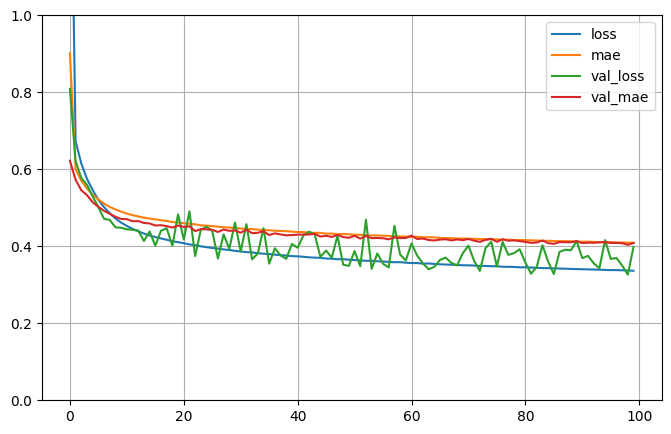

In [22]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Saving and Restoring Model

In [23]:
model.save('Functiional_api_keras.h5')

In [24]:
!pwd

/mnt/5ff35851-e696-47f0-8920-df3819357d4b/Drive E/tkmic/All mchin lrn/Udemy_ANN


In [35]:
del model # deleting model

In [36]:
keras.backend.clear_session() # clearing session

In [37]:
# loading model
model = keras.models.load_model('Functiional_api_keras.h5')

In [38]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [39]:
 ## clearing model for learning callbacks
del model

In [40]:
keras.backend.clear_session()

# Callbacks - saving model with each epoch

In [41]:
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [47]:
!mkdir 'callback_eg'

In [48]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('callback_eg/Model-{epoch:02d}.h5')

In [49]:
model_history = model.fit(x_train, y_train, epochs=30, 
                          validation_data=(x_valid,y_valid),
                         callbacks=[checkpoint_cb])

Epoch 1/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3968 - val_loss: 0.3940
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3944 - val_loss: 0.4115
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3921 - val_loss: 0.3993
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3899 - val_loss: 0.4009
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3880 - val_loss: 0.3894
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3860 - val_loss: 0.3973
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3844 - val_loss: 0.3844
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3827 - val_loss: 0.3752
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3812 - val_loss: 0.3771
Epoch 10/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3796 - val_loss: 0.3840